<a href="https://colab.research.google.com/github/Sovit1056/Pytorch_practice/blob/main/01_pyotrch_workflow_exersice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Lets start coding: Setting weight=0.3 and bias=0.9 there should be at least 100 datapoints total.

In [268]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


#### Creating and Splitting the data

In [269]:
weight=0.3
bais= 0.9

X = torch.arange(0 , 50, 0.5).unsqueeze(dim=1)  ### unsqueezed is very important
y = weight * X + bais

X[:5],y[:5]

(tensor([[0.0000],
         [0.5000],
         [1.0000],
         [1.5000],
         [2.0000]]),
 tensor([[0.9000],
         [1.0500],
         [1.2000],
         [1.3500],
         [1.5000]]))

In [270]:
# spliting the data
train_split = int(0.8*len(X))
X_train = X[:train_split]
y_train = y[: train_split]
X_test = X[train_split:]
y_test = y[train_split:]

X_train[:5],y_train[:5],X_test[:5],y_test[:5]

(tensor([[0.0000],
         [0.5000],
         [1.0000],
         [1.5000],
         [2.0000]]),
 tensor([[0.9000],
         [1.0500],
         [1.2000],
         [1.3500],
         [1.5000]]),
 tensor([[40.0000],
         [40.5000],
         [41.0000],
         [41.5000],
         [42.0000]]),
 tensor([[12.9000],
         [13.0500],
         [13.2000],
         [13.3500],
         [13.5000]]))

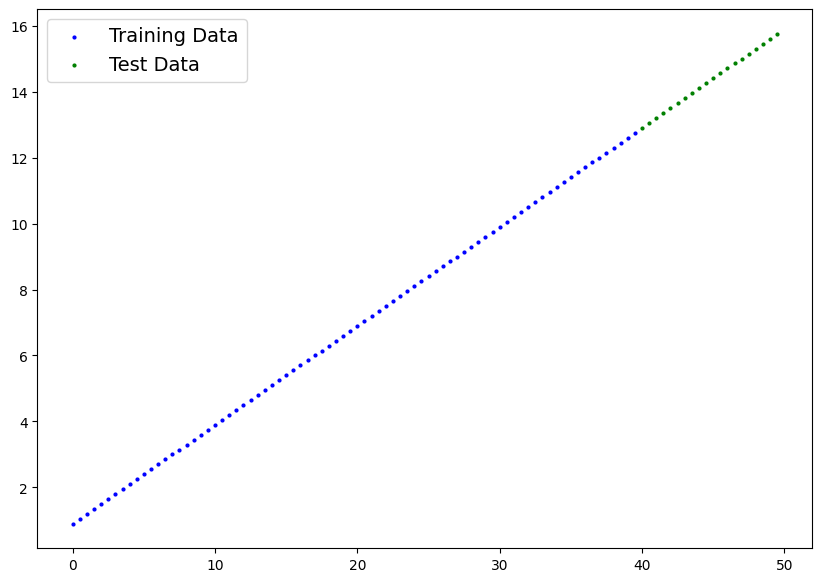

In [271]:
# Ploting the data now for visualization or deine the function for plotting and visualization

def plot_data(train_data = X_train,
              train_lables = y_train,
              test_data = X_test,
              test_lables = y_test,
              prediction = None):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_lables,c="b", s= 4, label = "Training Data")
  plt.scatter(test_data,test_lables,c="g", s= 4, label = "Test Data")
  if prediction != None :
    plt.scatter(test_data,prediction,c="r", s= 4, label = "Prediction Data")
  plt.legend(prop={"size":14})

plot_data();

In [272]:
# At first lets create the class

class linear_analysis(nn.Module):

  def __init__(self):
    super().__init__()

    self.linear_layer= nn.Linear(in_features=1,
                                 out_features=1)

  def forward(self,x : torch.Tensor) -> torch.Tensor :
    return self.linear_layer(x)

In [273]:
# deine the random weight and bais
# create the model
torch.manual_seed(42)

model_exe = linear_analysis()

print(model_exe.state_dict())

OrderedDict([('linear_layer.weight', tensor([[0.7645]])), ('linear_layer.bias', tensor([0.8300]))])


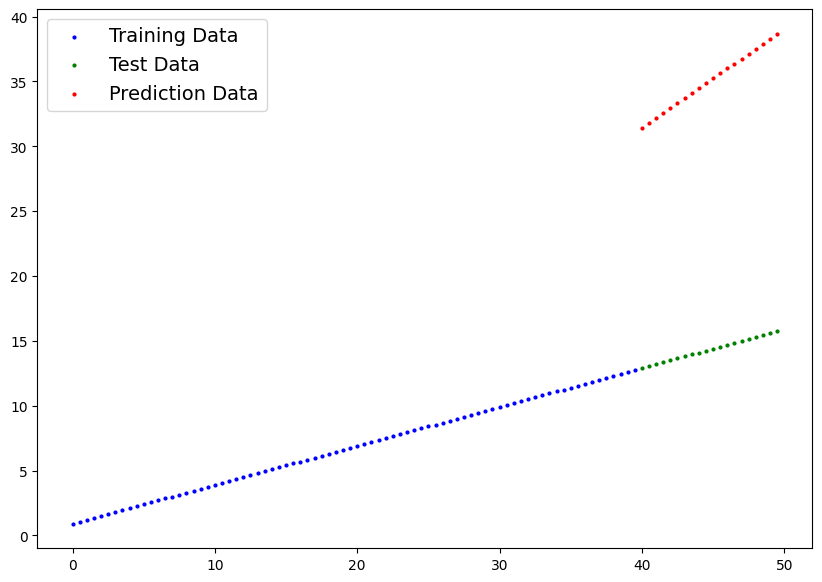

In [274]:
# Make prediction with model

with torch.inference_mode():
  y_preds = model_exe(X_test)

plot_data(prediction=y_preds)

In [275]:
# define the loss function and optimizer
loss_fn = nn.L1Loss() # same as MAE

optimizer =  torch.optim.SGD(params = model_exe.parameters(),
                             lr=0.001)


In [276]:
# Now lets train the loop

torch.manual_seed(42)

epochs = 300

for epoch in range(epochs):
  model_exe.train()

   # 1. Forward pass
  y_pred = model_exe(X_train)

  # 2. Loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. backpropagation
  loss.backward()

  # 5. optimizer step
  optimizer.step()

  ### Testing
  model_exe.eval()
  with torch.inference_mode():
    test_pred = model_exe(X_test)

    #  Loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_exe.state_dict())



Epoch: 0 | Loss: 9.106392860412598 | Test loss: 19.83332061767578
OrderedDict([('linear_layer.weight', tensor([[0.7448]])), ('linear_layer.bias', tensor([0.8290]))])
Epoch: 100 | Loss: 0.15381193161010742 | Test loss: 0.6419564485549927
OrderedDict([('linear_layer.weight', tensor([[0.3162]])), ('linear_layer.bias', tensor([0.8175]))])
Epoch: 200 | Loss: 0.03540382534265518 | Test loss: 0.766048014163971
OrderedDict([('linear_layer.weight', tensor([[0.3187]])), ('linear_layer.bias', tensor([0.8281]))])


OrderedDict([('linear_layer.weight', tensor([[0.3007]])), ('linear_layer.bias', tensor([0.8366]))])



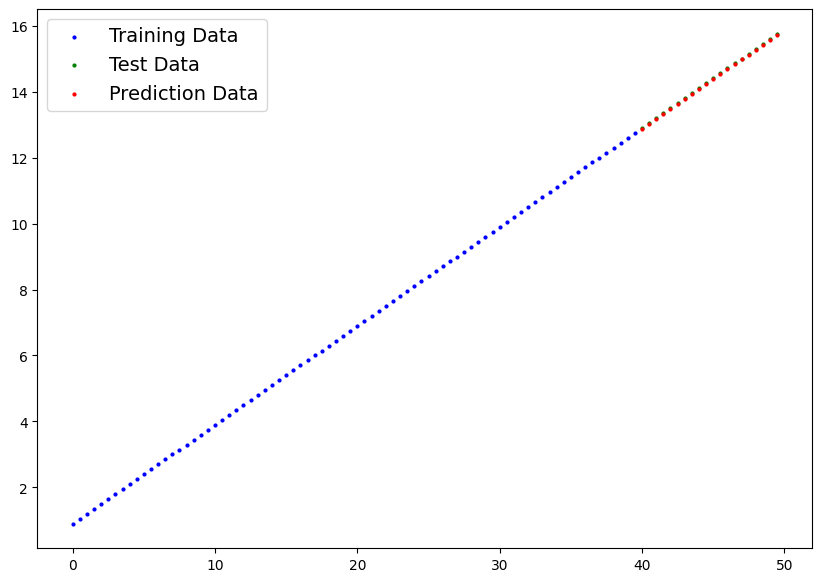

In [277]:

print(model_exe.state_dict())
print()
plot_data(prediction = test_pred)


In [278]:
# Saving and loading
from pathlib import Path


Model_path = Path("models")
Model_path.mkdir(parents=True, exist_ok=True)

Model_Name= "01_pytorch test saving.pth"
Model_Save_path = Model_path / Model_Name

print(f"Saving model to: {Model_Save_path}")
torch.save(obj=model_exe.state_dict(),
           f=Model_Save_path)



Saving model to: models/01_pytorch test saving.pth


In [279]:
loaded_model_exe = linear_analysis()
print(list(loaded_model_exe.parameters()))

loaded_model_exe.load_state_dict(torch.load(f=Model_Save_path))
print(" \nLoaded paramters:\n")
list(loaded_model_exe.parameters())

[Parameter containing:
tensor([[0.7645]], requires_grad=True), Parameter containing:
tensor([0.8300], requires_grad=True)]
 
Loaded paramters:



[Parameter containing:
 tensor([[0.3007]], requires_grad=True),
 Parameter containing:
 tensor([0.8366], requires_grad=True)]

In [280]:
loaded_model_exe.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_exe(X_test)
  print(loaded_model_preds)


tensor([[12.8661],
        [13.0165],
        [13.1669],
        [13.3172],
        [13.4676],
        [13.6180],
        [13.7683],
        [13.9187],
        [14.0691],
        [14.2194],
        [14.3698],
        [14.5202],
        [14.6705],
        [14.8209],
        [14.9713],
        [15.1217],
        [15.2720],
        [15.4224],
        [15.5728],
        [15.7231]])


In [281]:
# Comparing
test_pred == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])